In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


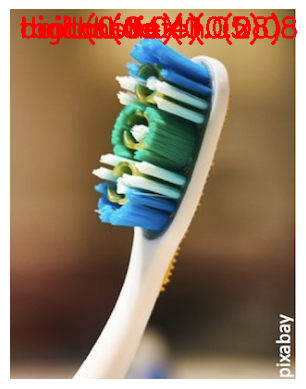

In [8]:

# Carregar o modelo MobileNet pré-treinado
model = tf.keras.applications.MobileNetV2(weights='imagenet')

# Função para carregar e pré-processar uma imagem
def load_and_preprocess_image(image_path):
    # Carregar a imagem
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)
    return img

# Função para fazer a predição de objetos em uma imagem
def predict_objects(image_path):
    # Carregar e pré-processar a imagem
    img = load_and_preprocess_image(image_path)
    
    # Adicionar uma dimensão extra para o batch
    img = np.expand_dims(img, axis=0)
    
    # Fazer a predição
    preds = model.predict(img)
    
    # Decodificar as previsões
    decoded_preds = tf.keras.applications.mobilenet_v2.decode_predictions(preds, top=5)[0]
    
    return decoded_preds

# Função para exibir a imagem com os objetos detectados
def display_image_with_objects(image_path, objects):
    # Carregar a imagem
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Desenhar caixas ao redor dos objetos detectados
    for _, label, confidence in objects:
        cv2.putText(img, f'{label} ({confidence:.2f})', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    # Exibir a imagem
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Caminho para a imagem que você deseja analisar
image_path = "imagem3.png"

# Fazer a predição de objetos na imagem
objects = predict_objects(image_path)

# Exibir a imagem com os objetos detectados
display_image_with_objects(image_path, objects)
